<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.520327,43.180399,65.760096,37.266758,2.418939,223.146519,219.218530,3.927989
1,0.0,1.0,73.184453,46.459992,53.569824,40.702835,-6.262117,217.654986,223.047093,-5.392108
2,0.0,2.0,26.640566,65.505809,21.401502,95.260079,6.402490,225.210446,219.148309,6.062138
3,0.0,3.0,31.725253,52.084797,76.707507,87.448451,-9.621040,248.344968,258.209472,-9.864503
4,0.0,4.0,47.659326,78.321101,39.017040,59.263110,1.935423,236.196000,234.430021,1.765979
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,73.965783,82.135066,28.913003,94.575071,-10.283007,279.305916,286.442309,-7.136392
119996,999.0,116.0,91.627166,37.188589,56.937300,99.559624,0.213378,295.526056,295.905025,-0.378969
119997,999.0,117.0,68.881019,26.846452,58.986593,49.046148,-1.183375,212.576837,215.955386,-3.378548
119998,999.0,118.0,64.209022,87.567435,89.021966,30.493140,7.406166,288.697730,281.482356,7.215374


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    64.520327  43.180399  65.760096  37.266758   2.418939   
      1.0    73.184453  46.459992  53.569824  40.702835  -6.262117   
      2.0    26.640566  65.505809  21.401502  95.260079   6.402490   
      3.0    31.725253  52.084797  76.707507  87.448451  -9.621040   
      4.0    47.659326  78.321101  39.017040  59.263110   1.935423   
...                ...        ...        ...        ...        ...   
999.0 115.0  73.965783  82.135066  28.913003  94.575071 -10.283007   
      116.0  91.627166  37.188589  56.937300  99.559624   0.213378   
      117.0  68.881019  26.846452  58.986593  49.046148  -1.183375   
      118.0  64.209022  87.567435  89.021966  30.493140   7.406166   
      119.0  59.005530  72.834759  70.902417  46.767058   6.783243   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    223.146519  219.218530  3.927989  
      1.0    217.654986  223.047093 -5.392108  
      2.0    225.210446  219.148309  6.062138  
      3.0    248.344968  258.209472 -9.864503  
      4.0    236.196000  234.430021  1.765979  
...                 ...         ...       ...  
999.0 115.0  279.305916  286.442309 -7.136392  
      116.0  295.526056  295.905025 -0.378969  
      117.0  212.576837  215.955386 -3.378548  
      118.0  288.697730  281.482356  7.215374  
      119.0  266.293007  259.085056  7.207952  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    64.520327  43.180399  65.760096  37.266758   2.418939   
      1.0    73.184453  46.459992  53.569824  40.702835  -6.262117   
      2.0    26.640566  65.505809  21.401502  95.260079   6.402490   
      3.0    31.725253  52.084797  76.707507  87.448451  -9.621040   
      4.0    47.659326  78.321101  39.017040  59.263110   1.935423   
...                ...        ...        ...        ...        ...   
999.0 115.0  73.965783  82.135066  28.913003  94.575071 -10.283007   
      116.0  91.627166  37.188589  56.937300  99.559624   0.213378   
      117.0  68.881019  26.846452  58.986593  49.046148  -1.183375   
      118.0  64.209022  87.567435  89.021966  30.493140   7.406166   
      119.0  59.005530  72.834759  70.902417  46.767058   6.783243   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    223.146519  219.218530  3.927989  
      1.0    217.654986  223.047093 -5.392108  
      2.0    225.210446  219.148309  6.062138  
      3.0    248.344968  258.209472 -9.864503  
      4.0    236.196000  234.430021  1.765979  
...                 ...         ...       ...  
999.0 115.0  279.305916  286.442309 -7.136392  
      116.0  295.526056  295.905025 -0.378969  
      117.0  212.576837  215.955386 -3.378548  
      118.0  288.697730  281.482356  7.215374  
      119.0  266.293007  259.085056  7.207952  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.520327,43.180399,65.760096,37.266758,2.418939,223.146519,219.218530,3.927989
1,0.0,1.0,73.184453,46.459992,53.569824,40.702835,-6.262117,217.654986,223.047093,-5.392108
2,0.0,2.0,26.640566,65.505809,21.401502,95.260079,6.402490,225.210446,219.148309,6.062138
3,0.0,3.0,31.725253,52.084797,76.707507,87.448451,-9.621040,248.344968,258.209472,-9.864503
4,0.0,4.0,47.659326,78.321101,39.017040,59.263110,1.935423,236.196000,234.430021,1.765979
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,73.965783,82.135066,28.913003,94.575071,-10.283007,279.305916,286.442309,-7.136392
119996,999.0,116.0,91.627166,37.188589,56.937300,99.559624,0.213378,295.526056,295.905025,-0.378969
119997,999.0,117.0,68.881019,26.846452,58.986593,49.046148,-1.183375,212.576837,215.955386,-3.378548
119998,999.0,118.0,64.209022,87.567435,89.021966,30.493140,7.406166,288.697730,281.482356,7.215374


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    64.520327  43.180399  65.760096  37.266758   2.418939   
      1.0    73.184453  46.459992  53.569824  40.702835  -6.262117   
      2.0    26.640566  65.505809  21.401502  95.260079   6.402490   
      3.0    31.725253  52.084797  76.707507  87.448451  -9.621040   
      4.0    47.659326  78.321101  39.017040  59.263110   1.935423   
...                ...        ...        ...        ...        ...   
999.0 115.0  73.965783  82.135066  28.913003  94.575071 -10.283007   
      116.0  91.627166  37.188589  56.937300  99.559624   0.213378   
      117.0  68.881019  26.846452  58.986593  49.046148  -1.183375   
      118.0  64.209022  87.567435  89.021966  30.493140   7.406166   
      119.0  59.005530  72.834759  70.902417  46.767058   6.783243   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    223.146519  219.218530  3.927989  
      1.0    217.654986  223.047093 -5.392108  
      2.0    225.210446  219.148309  6.062138  
      3.0    248.344968  258.209472 -9.864503  
      4.0    236.196000  234.430021  1.765979  
...                 ...         ...       ...  
999.0 115.0  279.305916  286.442309 -7.136392  
      116.0  295.526056  295.905025 -0.378969  
      117.0  212.576837  215.955386 -3.378548  
      118.0  288.697730  281.482356  7.215374  
      119.0  266.293007  259.085056  7.207952  

[120000 rows x 8 columns]

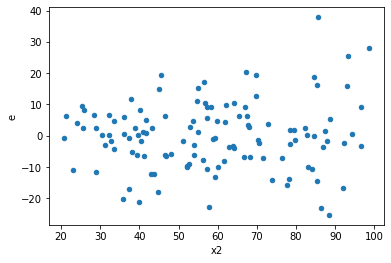

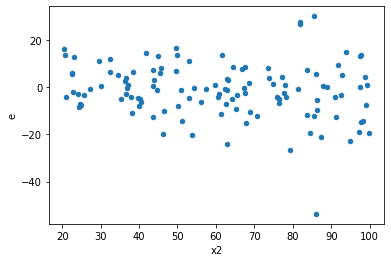

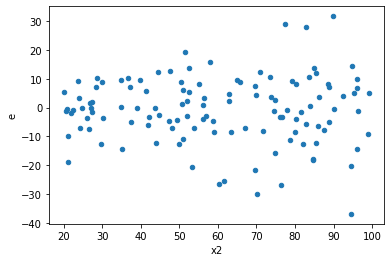

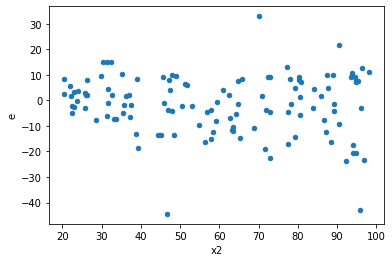

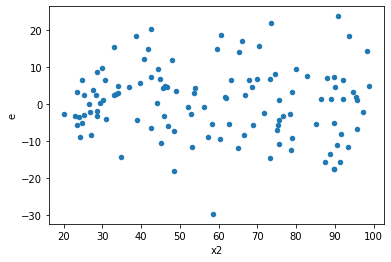

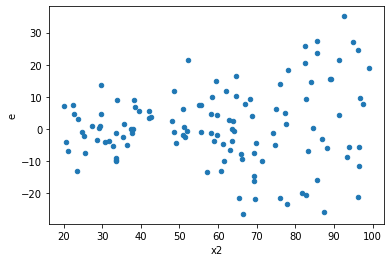

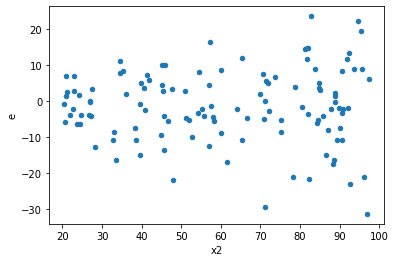

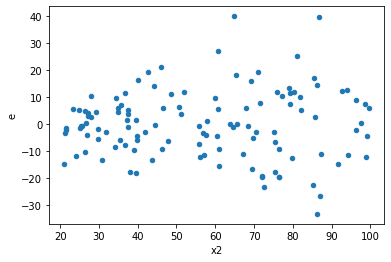

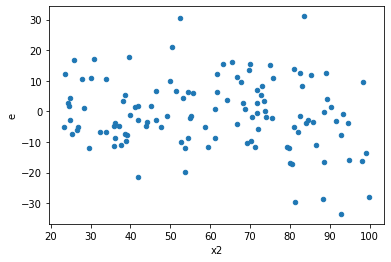

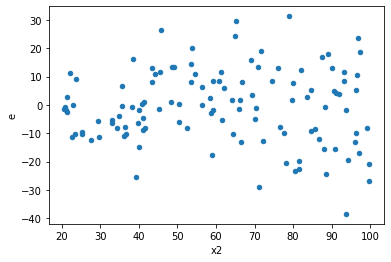

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,58.0,58.0,36975.22404004502,43738.266579007526,637.5038627593968,754.108044465647,1.1829074120453735,0.5244454787083135,0.7377772606458433,0.26222273935415674,Reject001=1 : Homoscedasticity
5.0,58.0,58.0,41207.94642887803,47501.311407797344,710.4818349806557,818.9881277206439,1.152722120957452,0.5901302332671046,0.7049348833664477,0.2950651166335523,Reject001=1 : Homoscedasticity
8.0,61.0,55.0,35332.06550063866,36110.42825310028,579.21418853506,656.5532409654597,1.133524098617136,0.6388217747025435,0.6805891126487282,0.31941088735127177,Reject001=1 : Homoscedasticity
9.0,58.0,58.0,49930.20518075913,56045.13665499622,860.8656065648125,966.2954595689004,1.122469584334765,0.6614467349252626,0.6692766325373687,0.3307233674626313,Reject001=1 : Homoscedasticity
12.0,53.0,63.0,37558.47894946878,52168.39202594528,708.6505462163921,828.0697146975441,1.1685163006205974,0.5505885878619177,0.7247057060690412,0.27529429393095883,Reject001=1 : Homoscedasticity
15.0,54.0,62.0,28281.916890405315,41495.44300141433,523.7392016741725,669.2813387324892,1.2778904779193159,0.3497777709176999,0.82511111454115,0.17488888545884995,Reject001=1 : Homoscedasticity
19.0,63.0,53.0,45631.93651420337,49243.1592026021,724.3164526064027,929.116211369851,1.2827490084292448,0.35317049137529866,0.8234147543123507,0.17658524568764933,Reject001=1 : Homoscedasticity
20.0,67.0,49.0,41993.7362726719,34518.62919669977,626.7721831742075,704.4618203408115,1.1239519545573238,0.6727084077937939,0.663645796103103,0.33635420389689696,Reject001=1 : Homoscedasticity
21.0,57.0,59.0,38690.28922417622,41945.08360095516,678.777003932916,710.9336203551721,1.0473743456775004,0.8595099712933609,0.5702450143533195,0.42975498564668047,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,59.0,57.0,41583.67766152673,36644.97220676475,704.8080959580801,642.8942492414869,0.9121550290474024,0.726260917714071,Reject001=1 : Homoscedasticity
1.0,58.0,58.0,36975.22404004502,43738.266579007526,637.5038627593968,754.108044465647,1.1829074120453735,0.5244454787083135,Reject001=1 : Homoscedasticity
2.0,50.0,66.0,34138.37037793478,42165.930676281765,682.7674075586956,638.8777375194206,0.9357179772300395,0.8127566442567856,Reject001=1 : Homoscedasticity
3.0,51.0,65.0,38702.19141730068,48123.92607686389,758.8664983784447,740.3680934902137,0.9756236374543367,0.9345157044392969,Reject001=1 : Homoscedasticity
4.0,57.0,59.0,37695.37735999127,32928.030625080064,661.3224098244082,558.1022139844079,0.8439184967776807,0.5214502127025621,Reject001=1 : Homoscedasticity
5.0,58.0,58.0,41207.94642887803,47501.311407797344,710.4818349806557,818.9881277206439,1.152722120957452,0.5901302332671046,Reject001=1 : Homoscedasticity
6.0,64.0,52.0,43532.69935491143,29763.197167084538,680.198427420491,572.3691762900872,0.8414738306006918,0.508255370261017,Reject001=1 : Homoscedasticity
7.0,63.0,53.0,60497.972880844885,37407.0242515453,960.2852838229347,705.792910406515,0.7349825331038343,0.24058257739472838,Reject001=1 : Homoscedasticity
8.0,61.0,55.0,35332.06550063866,36110.42825310028,579.21418853506,656.5532409654597,1.133524098617136,0.6388217747025435,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      997
Reject001=0 : Heteroscedasticity      3
Name: Result_test, dtype: int64